<a href="https://colab.research.google.com/github/shiyuuthscsa1/5201_Term-Project/blob/main/Random_Forest_%2B_BART_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("ggplot2")
install.packages("cowplot")
install.packages("randomForest")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(cowplot)
library(randomForest)
library(dplyr)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Step 1: Data Clean Up**

In [5]:
data <- read.csv("ML Final Data.csv")
head(data)
str(data)

,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,HbA1c,URDACT,Work.VPA.MIN,Recreational.VPA.MIN,Work.MPA.MIN,Recreational.MPA.MIN,Transport.MPA.MIN,total_MIN,BMXWT,BMXBMI,SED
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,34,3,1.36,5.2,12.22,0,0,0,0,0,0,87.4,32.22,480
2,2,60,3,0.69,6.0,6.77,0,0,0,0,0,0,116.8,42.39,240
3,1,26,2,1.01,5.1,2.87,0,480,0,0,105,585,97.6,32.61,720
4,2,49,4,1.91,5.3,8.39,0,0,0,0,0,0,86.7,30.57,240
5,1,80,4,1.27,5.4,4.26,0,0,1500,240,1680,3420,79.1,26.04,60
6,1,80,2,1.69,6.8,27.98,0,0,30,0,0,30,89.6,27.62,540


'data.frame':	23045 obs. of  15 variables:
 $ RIAGENDR            : int  1 2 1 2 1 1 2 2 1 1 ...
 $ RIDAGEYR            : int  34 60 26 49 80 80 42 45 28 44 ...
 $ DMDEDUC2            : int  3 3 2 4 4 2 2 5 1 3 ...
 $ INDFMPIR            : num  1.36 0.69 1.01 1.91 1.27 1.69 2.35 5 0.09 4.43 ...
 $ HbA1c               : num  5.2 6 5.1 5.3 5.4 6.8 11 5.1 5.9 5.4 ...
 $ URDACT              : num  12.22 6.77 2.87 8.39 4.26 ...
 $ Work.VPA.MIN        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recreational.VPA.MIN: int  0 0 480 0 0 0 0 90 60 0 ...
 $ Work.MPA.MIN        : int  0 0 0 0 1500 30 0 420 0 0 ...
 $ Recreational.MPA.MIN: int  0 0 0 0 240 0 0 300 120 0 ...
 $ Transport.MPA.MIN   : int  0 0 105 0 1680 0 0 0 120 0 ...
 $ total_MIN           : int  0 0 585 0 3420 30 0 810 300 0 ...
 $ BMXWT               : num  87.4 116.8 97.6 86.7 79.1 ...
 $ BMXBMI              : num  32.2 42.4 32.6 30.6 26 ...
 $ SED                 : num  480 240 720 240 60 540 30 720 30 600 ...


In [6]:
data[data$RIAGENDR == 1, ]$RIAGENDR <- "M"
data[data$RIAGENDR == 2, ]$RIAGENDR <- "F"
data$RIAGENDR <- as.factor(data$RIAGENDR)


data[data$DMDEDUC2 == 1, ]$DMDEDUC2 <- "High school or lower"
data[data$DMDEDUC2 == 2, ]$DMDEDUC2 <- "High school or lower"
data[data$DMDEDUC2 == 3, ]$DMDEDUC2 <- "High school or lower"
data[data$DMDEDUC2 == 4, ]$DMDEDUC2 <- "Higher than high school"
data[data$DMDEDUC2 == 5, ]$DMDEDUC2 <- "Higher than high school"
data <- data[data$DMDEDUC2 != 7, ]  
data <- data[data$DMDEDUC2 != 9, ]
data$DMDEDUC2 <- as.factor(data$DMDEDUC2)

summary(data)


 RIAGENDR     RIDAGEYR                       DMDEDUC2        INDFMPIR    
 F:11889   Min.   :20.0   High school or lower   :10255   Min.   :0.000  
 M:11140   1st Qu.:34.0   Higher than high school:12774   1st Qu.:1.080  
           Median :49.0                                   Median :2.060  
           Mean   :49.2                                   Mean   :2.488  
           3rd Qu.:63.0                                   3rd Qu.:4.040  
           Max.   :80.0                                   Max.   :5.000  
     HbA1c            URDACT          Work.VPA.MIN    Recreational.VPA.MIN
 Min.   : 3.500   Min.   :    0.25   Min.   :   0.0   Min.   :   0.00     
 1st Qu.: 5.200   1st Qu.:    4.61   1st Qu.:   0.0   1st Qu.:   0.00     
 Median : 5.500   Median :    7.14   Median :   0.0   Median :   0.00     
 Mean   : 5.787   Mean   :   44.38   Mean   : 164.7   Mean   :  54.74     
 3rd Qu.: 5.900   3rd Qu.:   13.68   3rd Qu.:   0.0   3rd Qu.:   0.00     
 Max.   :17.800   Max.   :21152.

**Step 2: Set up the training and test data. To make it easier for computation. We split data to 1:4 (1 for training, 4 for testing)**

In [8]:
n <- nrow(data)
set.seed (13)
ntest <- trunc(n / 4)
trainid <- sample (1:n, ntest)
testid <- as.numeric(rownames(data[-trainid,]))


xtrain <- na.omit(select(data[trainid,], -"HbA1c"))
ytrain <- na.omit(data[trainid, "HbA1c"])

ytest <- na.omit(data[testid, "HbA1c"])
xtest <- na.omit(select(data[testid,], -"HbA1c"))

**Step 3: Fit training data to random forest mode by default values**

In [9]:
rf.nhanes <- randomForest(HbA1c~., data = data, subset = trainid)
rf.nhanes



Call:
 randomForest(formula = HbA1c ~ ., data = data, subset = trainid) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 1.049751
                    % Var explained: 16.63

Summary: 
The random forest was built to predict HbA1c.
The default number of trees is 500
4 variables were considered at each internal node by default when building the trees 

**Step 4: Plot the training MSE by number of trees to select optional number of trees.**

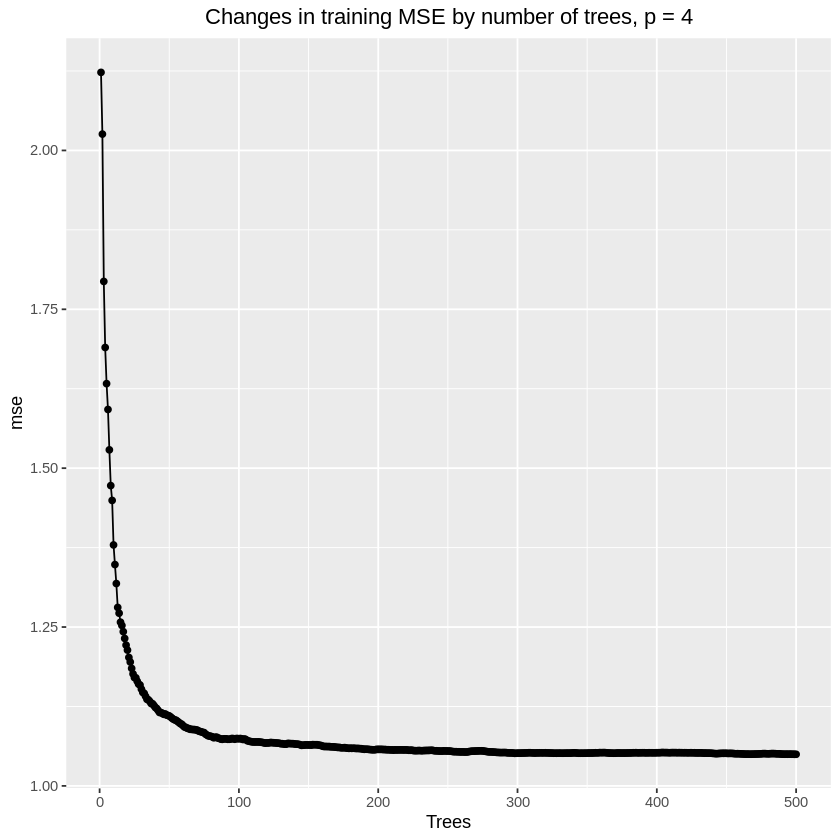

In [10]:
rf.mse <- data.frame(Trees = rep(1:500), mse = c(rf.nhanes$mse))
ggplot(data = rf.mse, aes(x=Trees, y=mse)) + geom_point() + geom_line() + 
  ggtitle("Changes in training MSE by number of trees, p = 4") + theme(plot.title = element_text(hjust = 0.5))


Training MSE becomes stable after ntrees >= 250
Therefore, I chose ntrees = 250

**Step 5: Select the optimal number of variables (total p = 14, ntrees = 250)**

In [11]:
train.mse <- vector(length = 14)
for (i in 1:14){
  temp.model <- randomForest(HbA1c~., data = data, subset = trainid, mtry = i, ntree = 250)
  train.mse[i] <- temp.model$mse[250]
}
data.frame(num_var = rep(1:14), mse = c(train.mse))


num_var,mse
<int>,<dbl>
1,1.069842
2,1.042850
3,1.051861
4,1.061873
5,1.068276
6,1.070207
7,1.067068
8,1.081271
9,1.085140


The 2nd value, corresponding to mtry = 2, has the lowest training MSE. 

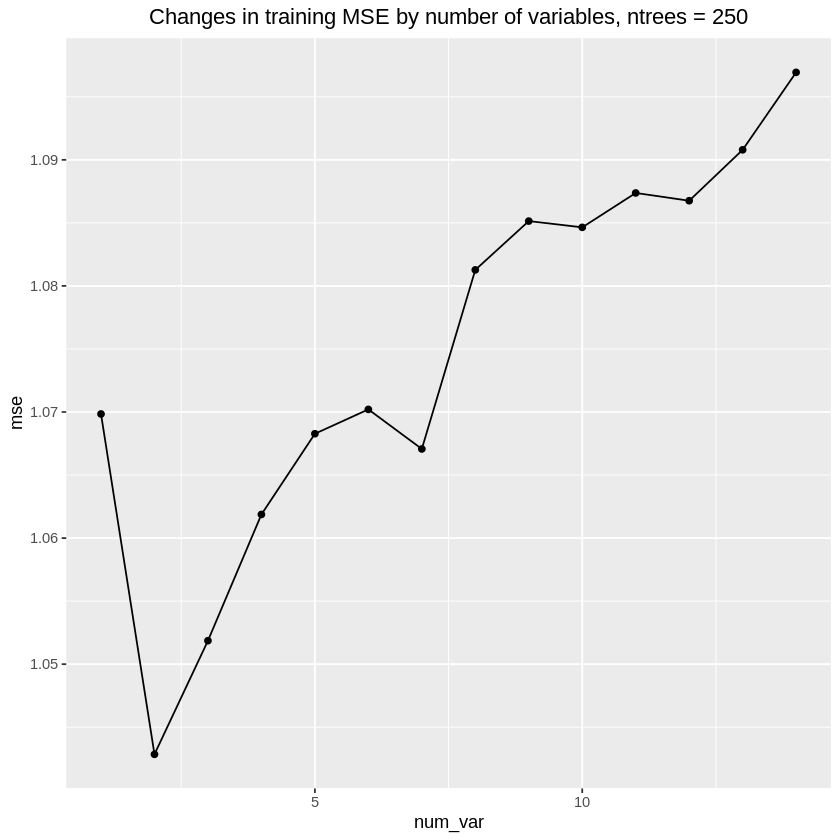

In [13]:
ggplot(data = data.frame(num_var = rep(1:14), mse = c(train.mse)), aes(x=num_var, y=mse)) + geom_point() + geom_line() + 
  ggtitle("Changes in training MSE by number of variables, ntrees = 250") + theme(plot.title = element_text(hjust = 0.5))


**Step 6: Fit the training data into the optimal random forest model, p = 2, ntrees = 250**

In [16]:
rf.nhanes.new <- randomForest(HbA1c~., data = data, subset = trainid, mtry = 2, ntree = 250)

In [17]:
rf.nhanes.new


Call:
 randomForest(formula = HbA1c ~ ., data = data, mtry = 2, ntree = 250,      subset = trainid) 
               Type of random forest: regression
                     Number of trees: 250
No. of variables tried at each split: 2

          Mean of squared residuals: 1.050871
                    % Var explained: 16.54

**Step 6: Predict HbA1c using testing dataset**

In [37]:
test_HbA1c <- na.omit(data[testid, "HbA1c"])
data.test <- na.omit(select(data[testid,], -"HbA1c"))
yhat.rf <- predict(rf.nhanes.new, newdata = data.test)
mean((yhat.rf - test_HbA1c)^2)
mean(abs(yhat.rf - test_HbA1c))

[1] 0.8283259

[1] 0.5022632

**Step 7: Compare the importance of each variable in the training and testing model**

,IncNodePurity
RIAGENDR,82.43042
RIDAGEYR,878.67896
DMDEDUC2,93.72412
INDFMPIR,519.98497
URDACT,1035.67428
Work.VPA.MIN,135.92307
Recreational.VPA.MIN,183.60911
Work.MPA.MIN,227.99839
Recreational.MPA.MIN,219.69615
Transport.MPA.MIN,196.05771


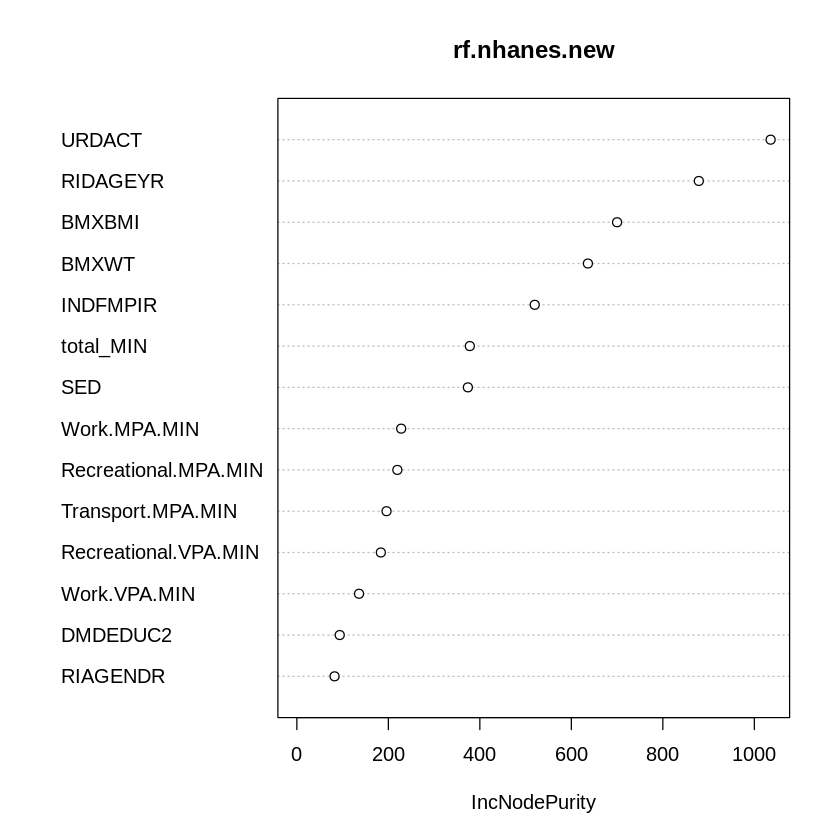

In [39]:
importance(rf.nhanes.new)
varImpPlot(rf.nhanes.new)

### BART

In [38]:
install.packages("BART")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
library(BART)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: nnet

Loading required package: survival



**Step 1: Fit training and testing data into gbart function with default settings**

In [43]:
xtrain <- na.omit(select(data[trainid,], -"HbA1c"))
ytrain <- na.omit(data[trainid, "HbA1c"])

ytest <- na.omit(data[testid, "HbA1c"])
xtest <- na.omit(select(data[testid,], -"HbA1c"))

In [44]:
bart.nhanes <- gbart(xtrain, ytrain, x.test = xtest)

*****Calling gbart: type=1
*****Data:
data:n,p,np: 5757, 16, 17262
y1,yn: -0.601285, 1.598715
x1,x[n*p]: 1.000000, 120.000000
xp1,xp[np*p]: 0.000000, 720.000000
*****Number of Trees: 200
*****Number of Cut Points: 1 ... 37
*****burn,nd,thin: 100,1000,1
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.243952,3,0.208937,5.80129
*****sigma: 1.035672
*****w (weights): 1.000000 ... 1.000000
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,16,0
*****printevery: 100

MCMC
done 0 (out of 1100)
done 100 (out of 1100)
done 200 (out of 1100)
done 300 (out of 1100)
done 400 (out of 1100)
done 500 (out of 1100)
done 600 (out of 1100)
done 700 (out of 1100)
done 800 (out of 1100)
done 900 (out of 1100)
done 1000 (out of 1100)
time: 84s
trcnt,tecnt: 1000,1000


**Step 2: Compute the testing mse and mean absolute arror**

In [48]:
yhat.bart <- bart.nhanes$yhat.test.mean
mean((ytest - yhat.bart) ^ 2)
mean(abs(ytest - yhat.bart))

[1] 1.010012

[1] 0.5678105

**Step 3: Check how many times each variable appeared in the collection of trees**

In [47]:
ord <- order(bart.nhanes$varcount.mean, decreasing = T)
bart.nhanes$varcount.mean[ord]

RIDAGEYR            DMDEDUC22            RIAGENDR2 
              18.795               18.656               17.753 
           DMDEDUC21            RIAGENDR1               BMXBMI 
              16.141               15.791               14.561 
            INDFMPIR                  SED                BMXWT 
              14.361               13.798               13.299 
Recreational.VPA.MIN               URDACT    Transport.MPA.MIN 
              13.271               12.286               11.630 
        Work.MPA.MIN         Work.VPA.MIN Recreational.MPA.MIN 
              11.444               11.161               10.634 
           total_MIN 
              10.108